Code to run the emcee method to estimate the posterior distributions of parameters given data in a SEIR model 

In [1]:
%reset -f
import numpy as np
from samplers.SEIR_emcee import SEIR_emcee
from samplers.SEIR_pytwalk import SEIR_pytwalk
from samplers.SEIR_pyhmc import SEIR_pyhmc
from epidemic_model import SEIR_Model
from utils.utils import load_data, parser
import sys
import matplotlib.pyplot as plt
from time import time

In [2]:
from bokeh.io import output_notebook, show

output_notebook()

Loading BokehJS ...

Data loaded from file:  data/Smoothed_Cases_Third_Wave.csv


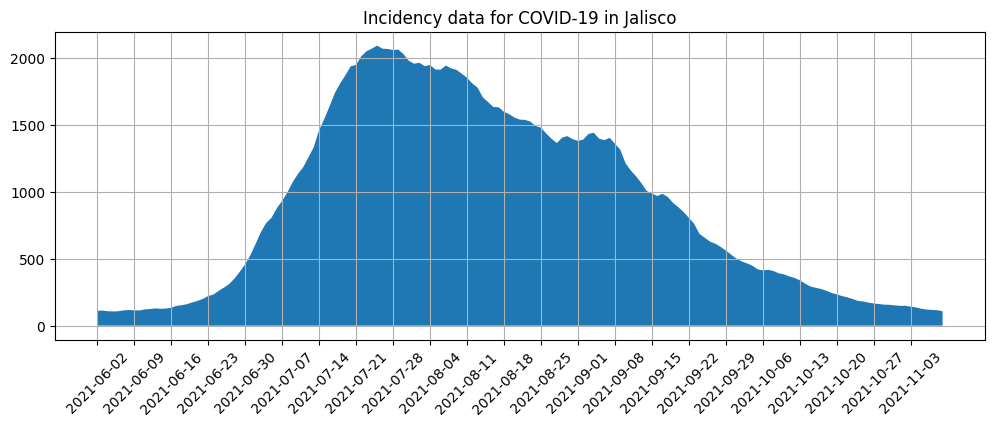

In [3]:
# Loading configuration from configuration file
fname_conf = './configuration_file_test.cfg'

params = parser(fname_conf)

times, data, dates = load_data(params['fname'])

print('Data loaded from file: ', params['fname'])

# plotting data
plt.figure(figsize=(12,4))
plt.fill_between(dates,data, label='Incidency data')
plt.xticks(dates[::7],rotation=45)
plt.title('Incidency data for COVID-19 in Jalisco')
plt.grid()
plt.show()


In [4]:
# Total population size is taken from the configuration file
N = params["N"]

#sigma_0 = 1/params["incubation_period"]
#gamma_0 = 1/params["infectious_period"]

# Setting initial conditions
I0 = params['I0']
E0 = 0 #data[0]/sigma_0 + gamma_0/sigma_0*I0
R0 = 0
S0 = N - E0 - I0 - R0

x0 = [S0,E0,I0,R0]

iterations = params['iterations']  # Number of iterations for the MCMC sampler
ndim = 3                           # Dimension of the problem is 3: beta, sigma, gamma
nwalkers = 3*ndim                  # Number of walkers for the MCMC sampler

In [5]:
# Building the emcee MCMC sampler
seir_emcee = SEIR_emcee(
    ndim = ndim,
    nwalkers = nwalkers,
    data=data,
    time=times,
    labels=['beta', 'sigma', 'gamma'],
    x0=x0,
    **params
    )

p0 = np.array([0.25,0.5,0.1])                               # Initial guess for the parameters
theta_0 = p0+np.random.randn(nwalkers, ndim) * 1e-1         # initial guess for the walkers. Are build around the initial guess


Incidency will be computed using method:  exposed


In [6]:
# Running the MCMC sampler
ini_time = time()
seir_emcee.run(iterations, theta_0)
end_time = time()
print('Time elapsed: ', end_time-ini_time)


  0%|          | 0/2000 [00:00<?, ?it/s]/opt/conda/envs/bnn-env/lib/python3.11/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in scalar subtract
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████| 2000/2000 [04:05<00:00,  8.16it/s]

Time elapsed:  245.13762664794922


In [7]:
seir_emcee.summary()

        mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
beta   2.874  2.750   0.234    6.155      0.837    0.076      14.0     138.0   
sigma  0.065  0.112   0.001    0.218      0.021    0.018      14.0     134.0   
gamma  0.096  0.071   0.021    0.179      0.023    0.001      14.0     397.0   

       r_hat  
beta    1.69  
sigma   1.70  
gamma   1.69  


In [8]:
seir_emcee.plot_rank_bars()

In [9]:
seir_emcee.plot_trace()

In [10]:
seir_emcee.plot_forest()

In [11]:
seir_emcee.plot_density()

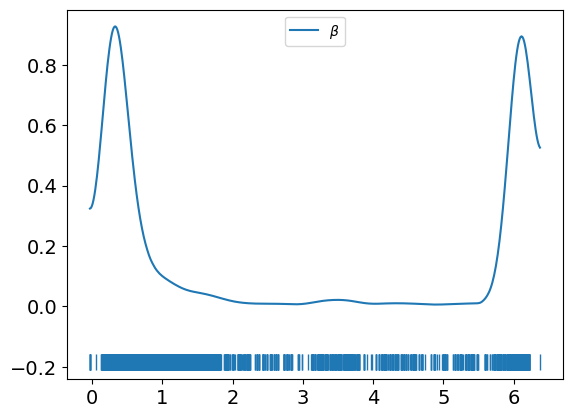

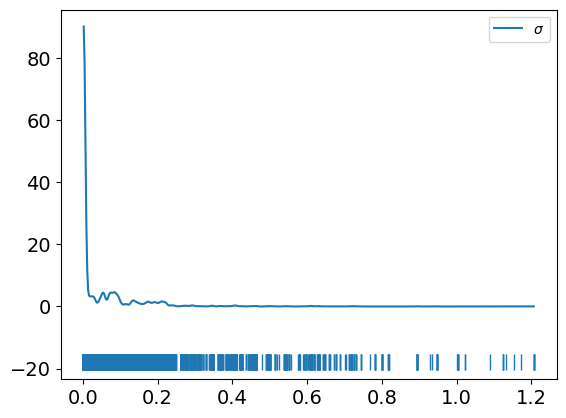

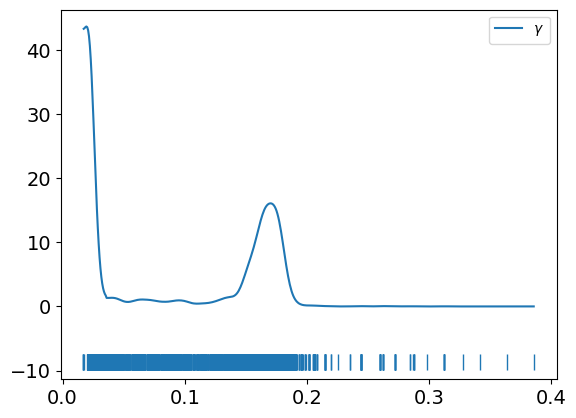

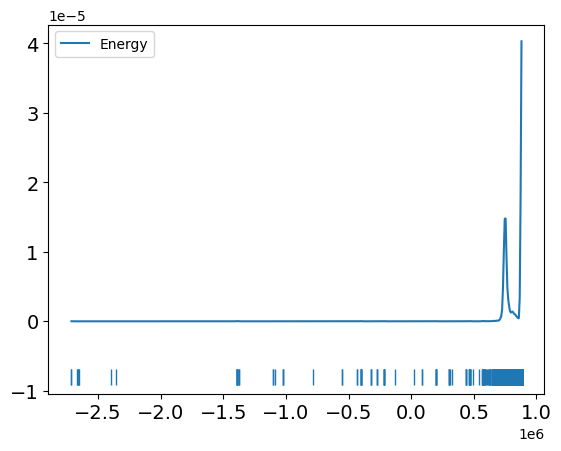

In [12]:
seir_emcee.plot_histograms()


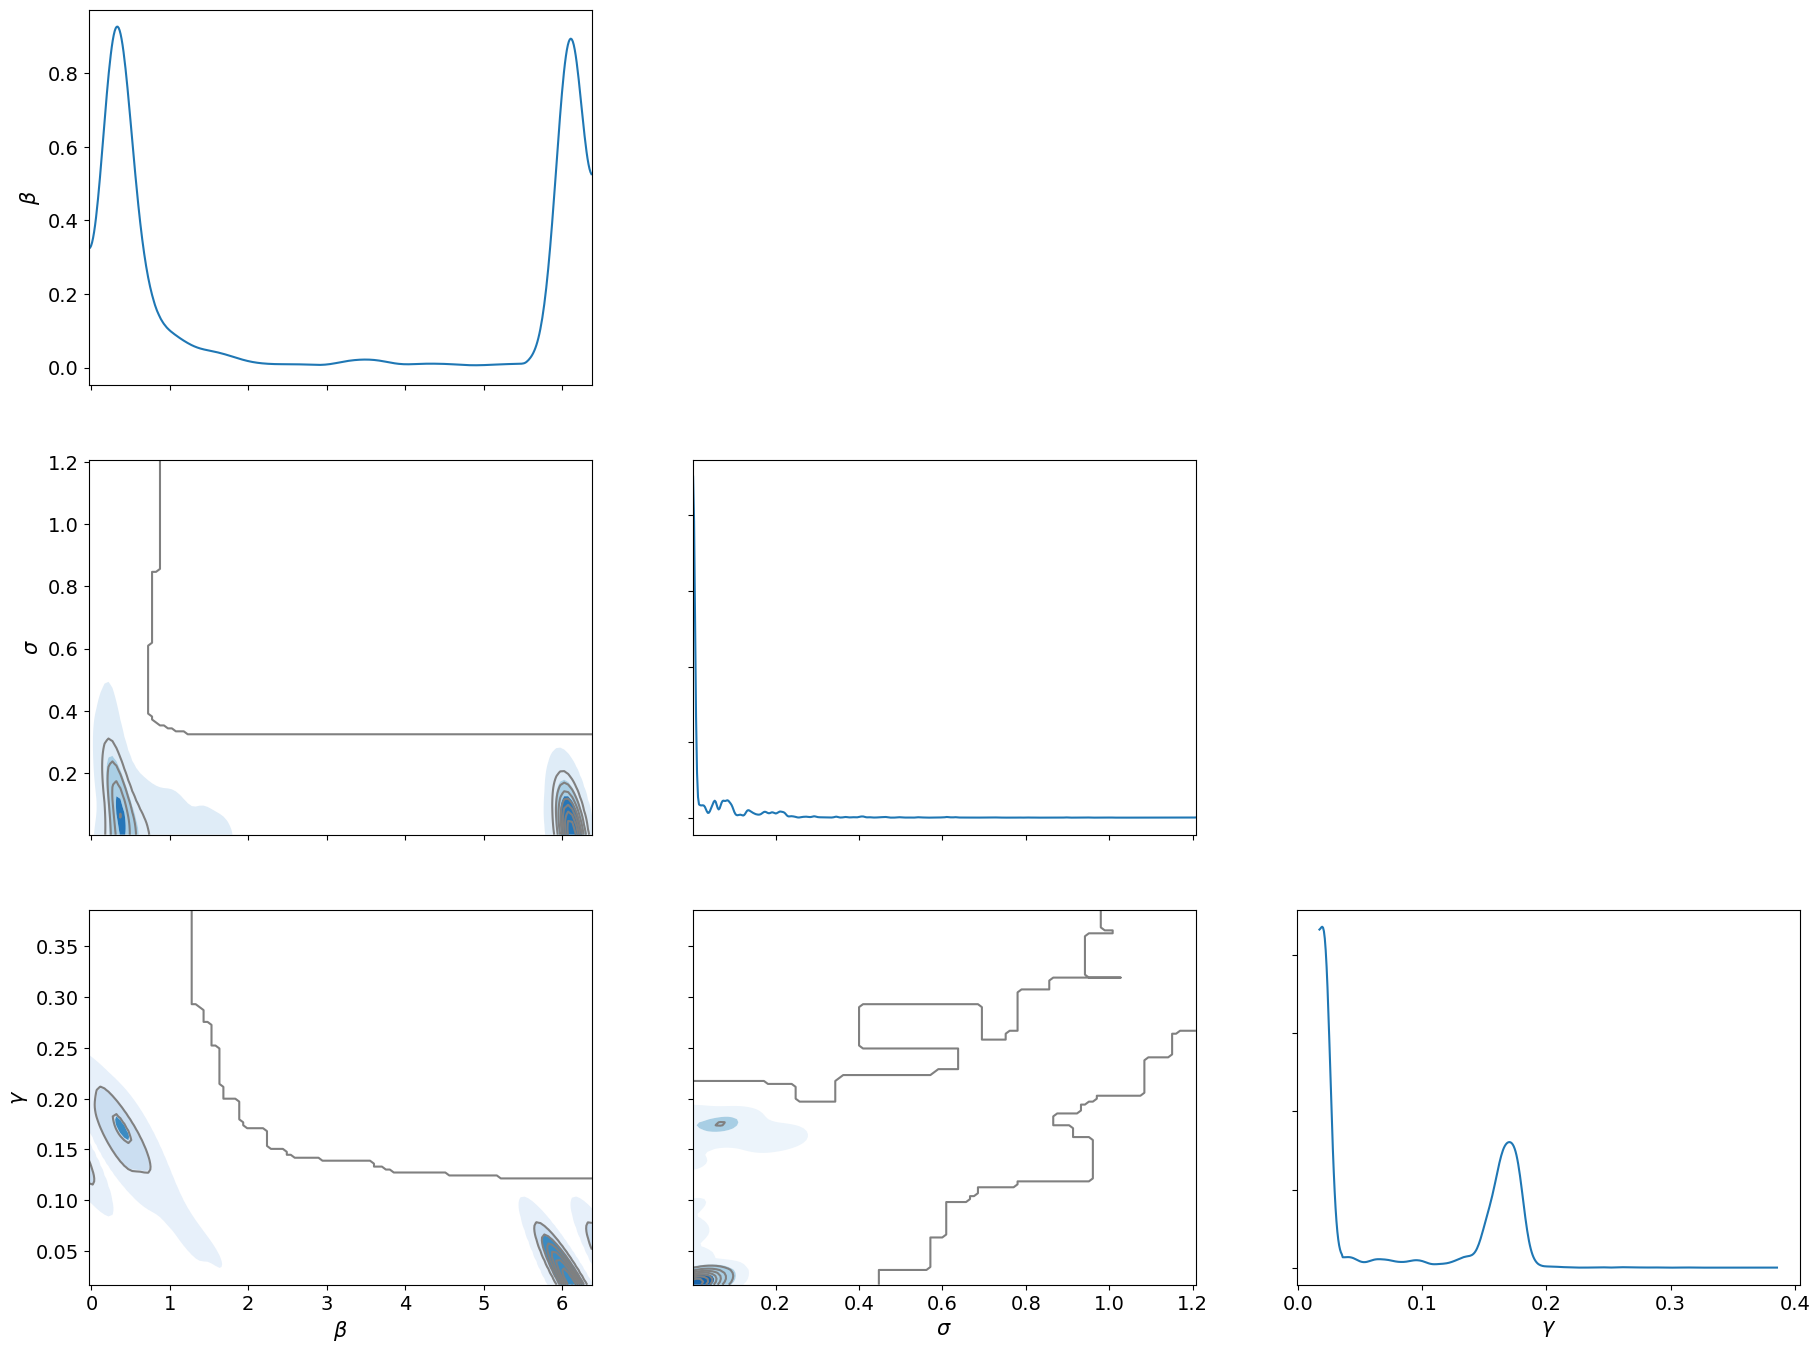

In [13]:
seir_emcee.plot_pair()

In [14]:
seir_emcee.plot_posterior()

In [15]:
seir_emcee.plot_parallel()


In [16]:
seir_emcee.plot_autocorr()

In [17]:
seir_emcee.plot_energy()

/opt/conda/envs/bnn-env/lib/python3.11/site-packages/arviz/plots/backends/bokeh/energyplot.py:76: RuntimeWarning: invalid value encountered in subtract
  (energy - energy.mean(), np.diff(energy)),
/opt/conda/envs/bnn-env/lib/python3.11/site-packages/numpy/lib/function_base.py:1448: RuntimeWarning: invalid value encountered in subtract
  a = op(a[slice1], a[slice2])
/opt/conda/envs/bnn-env/lib/python3.11/site-packages/arviz/stats/density_utils.py:488: UserWarning: Your data appears to have a single value or no finite values
  warnings.warn("Your data appears to have a single value or no finite values")
/opt/conda/envs/bnn-env/lib/python3.11/site-packages/numpy/core/_methods.py:236: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


Generating 500 prior samples. Prior model: Gamma


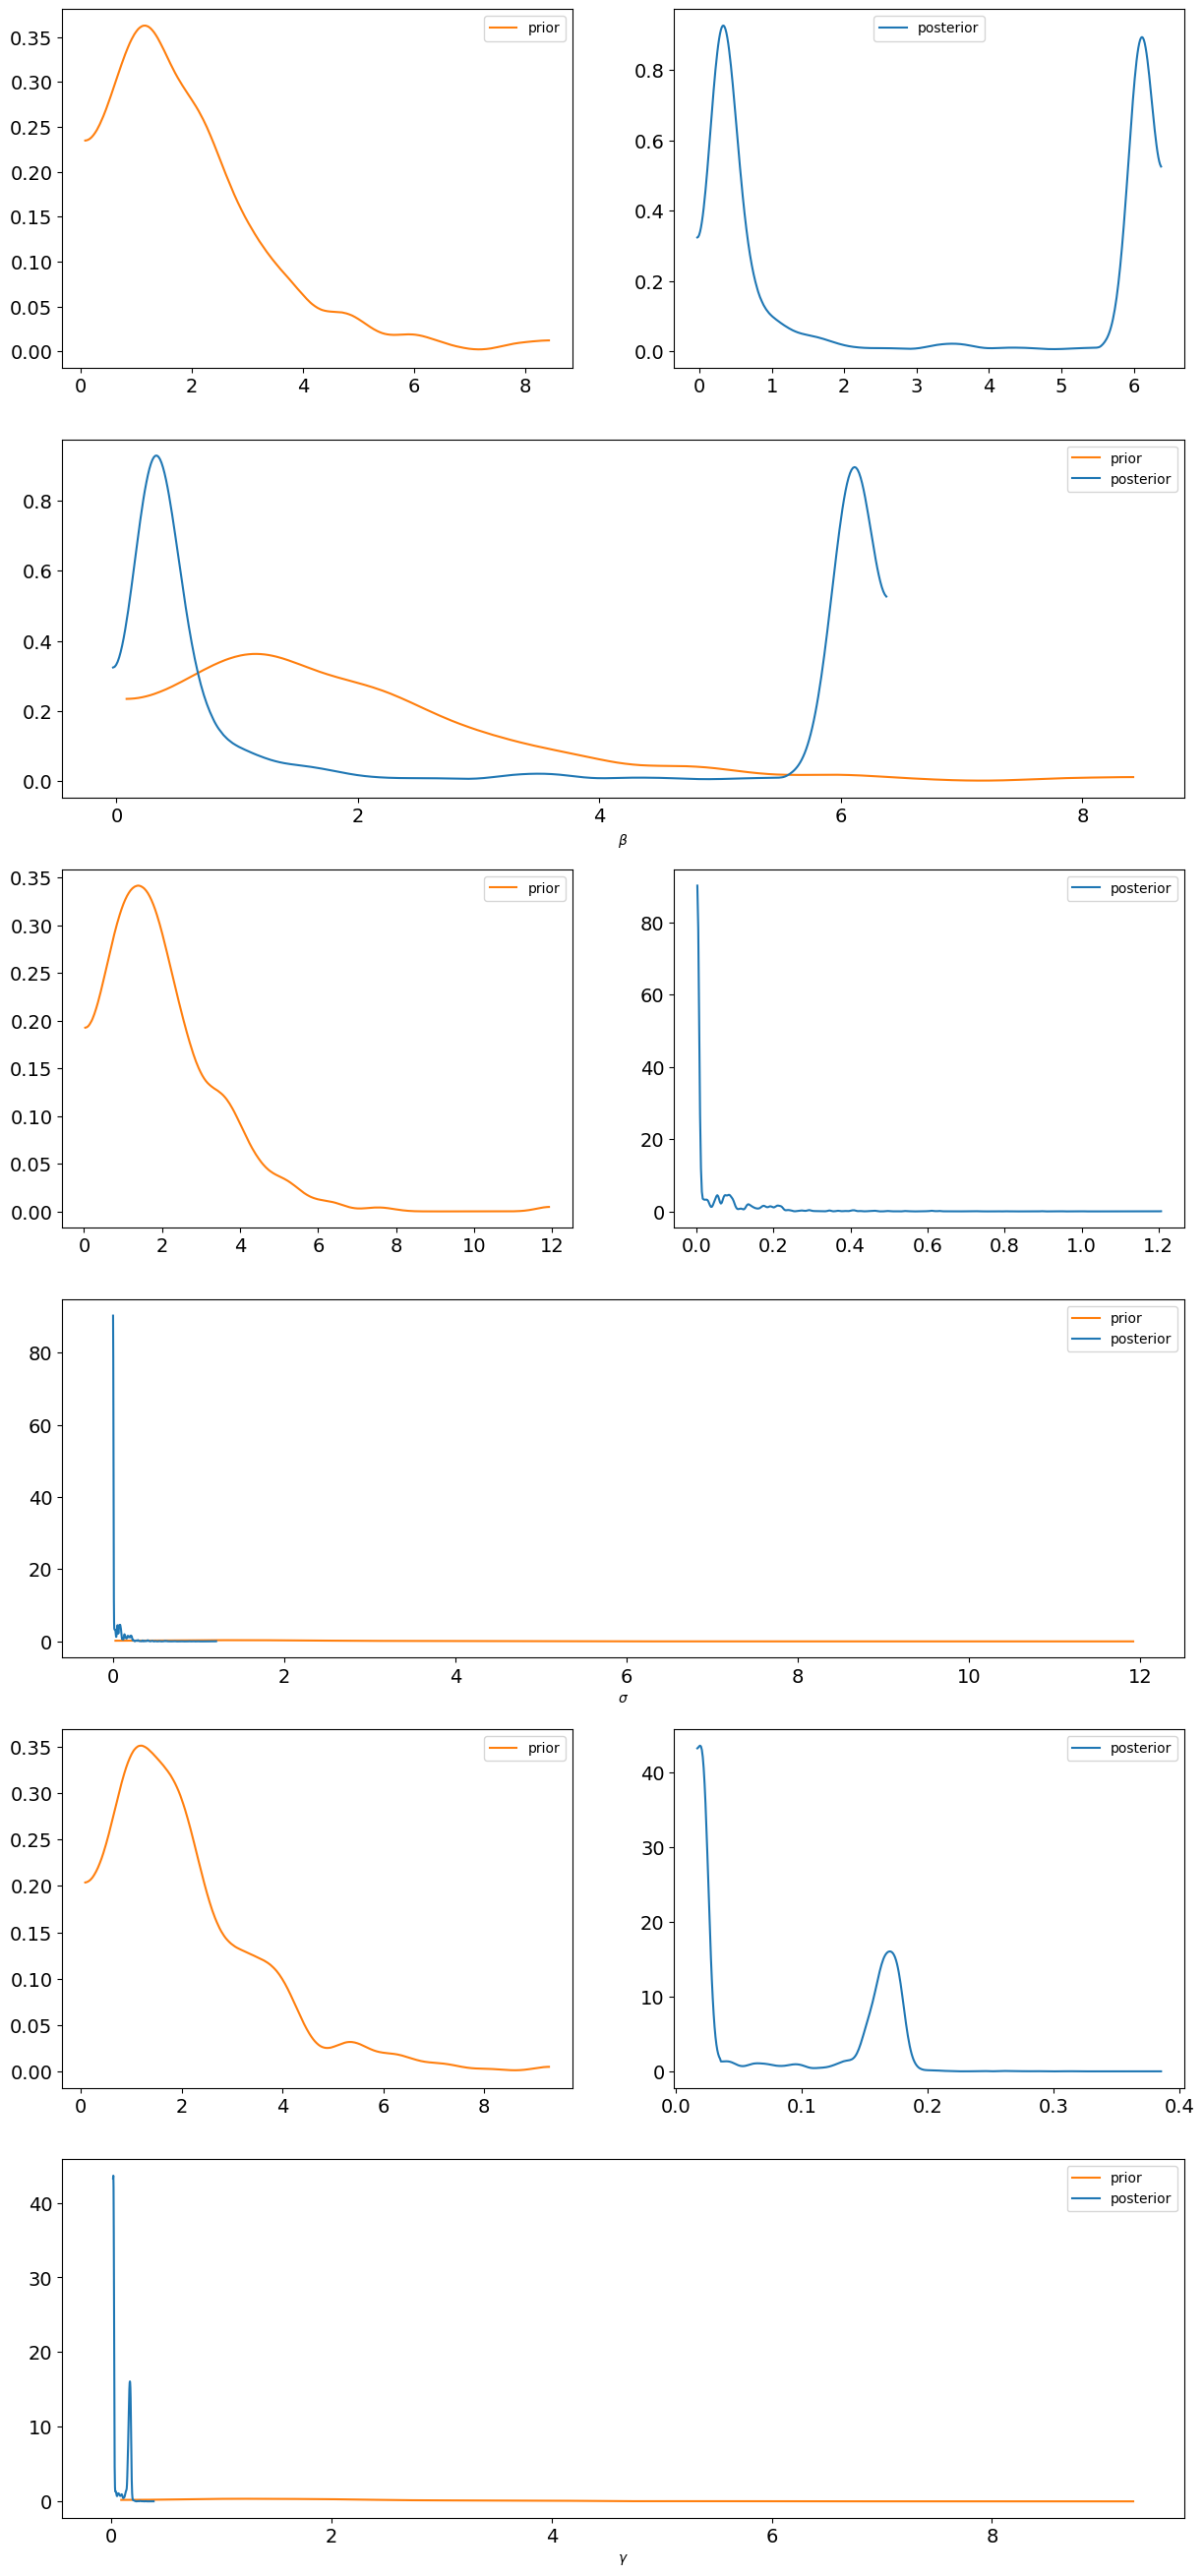

In [18]:
seir_emcee.plot_dist_comparison()


100%|██████████| 90/90 [00:01<00:00, 75.68it/s]


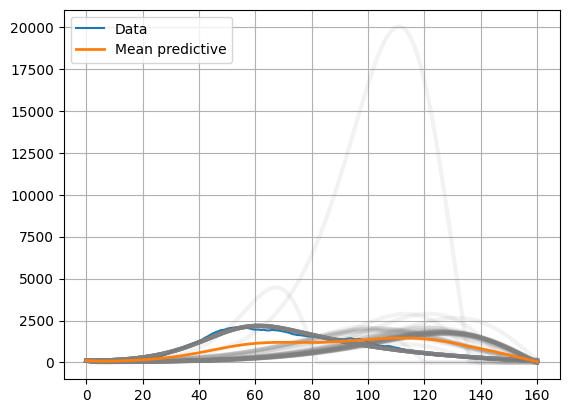

In [19]:
seir_emcee.plot_ppc(10)

        mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
beta   5.371  1.606   1.299    6.221      0.236    0.212      74.0     154.0   
sigma  0.002  0.001   0.001    0.005      0.000    0.000      79.0     155.0   
gamma  0.027  0.016   0.021    0.064      0.002    0.002      86.0     145.0   

       r_hat  
beta    1.09  
sigma   1.09  
gamma   1.09  


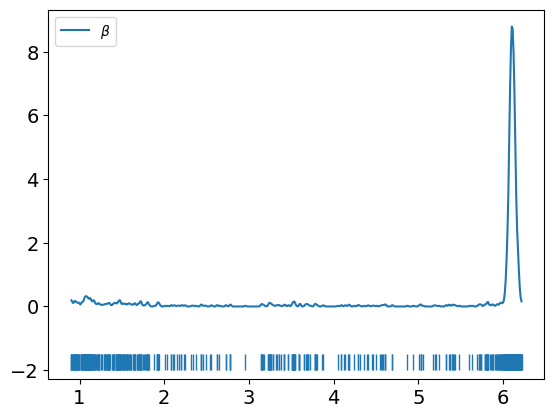

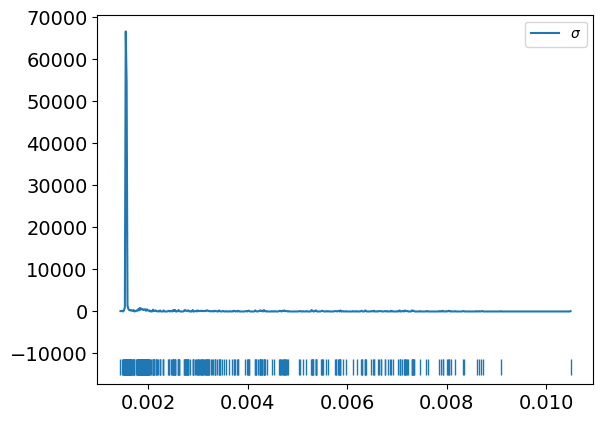

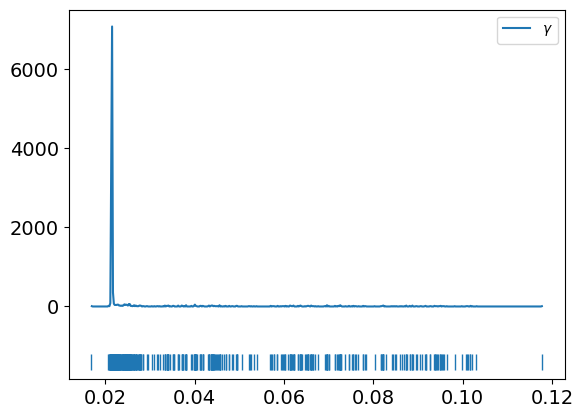

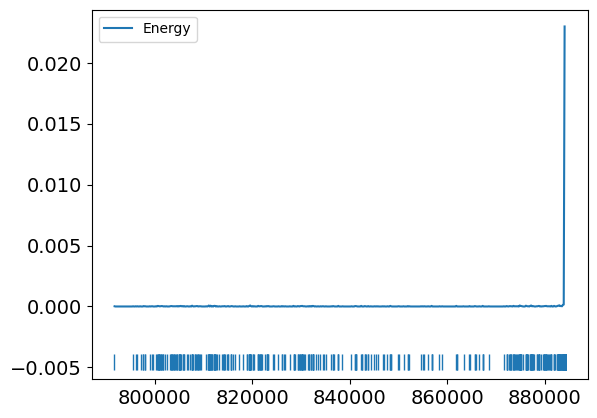

Generating 500 prior samples. Prior model: Gamma


100%|██████████| 180/180 [00:01<00:00, 125.84it/s]


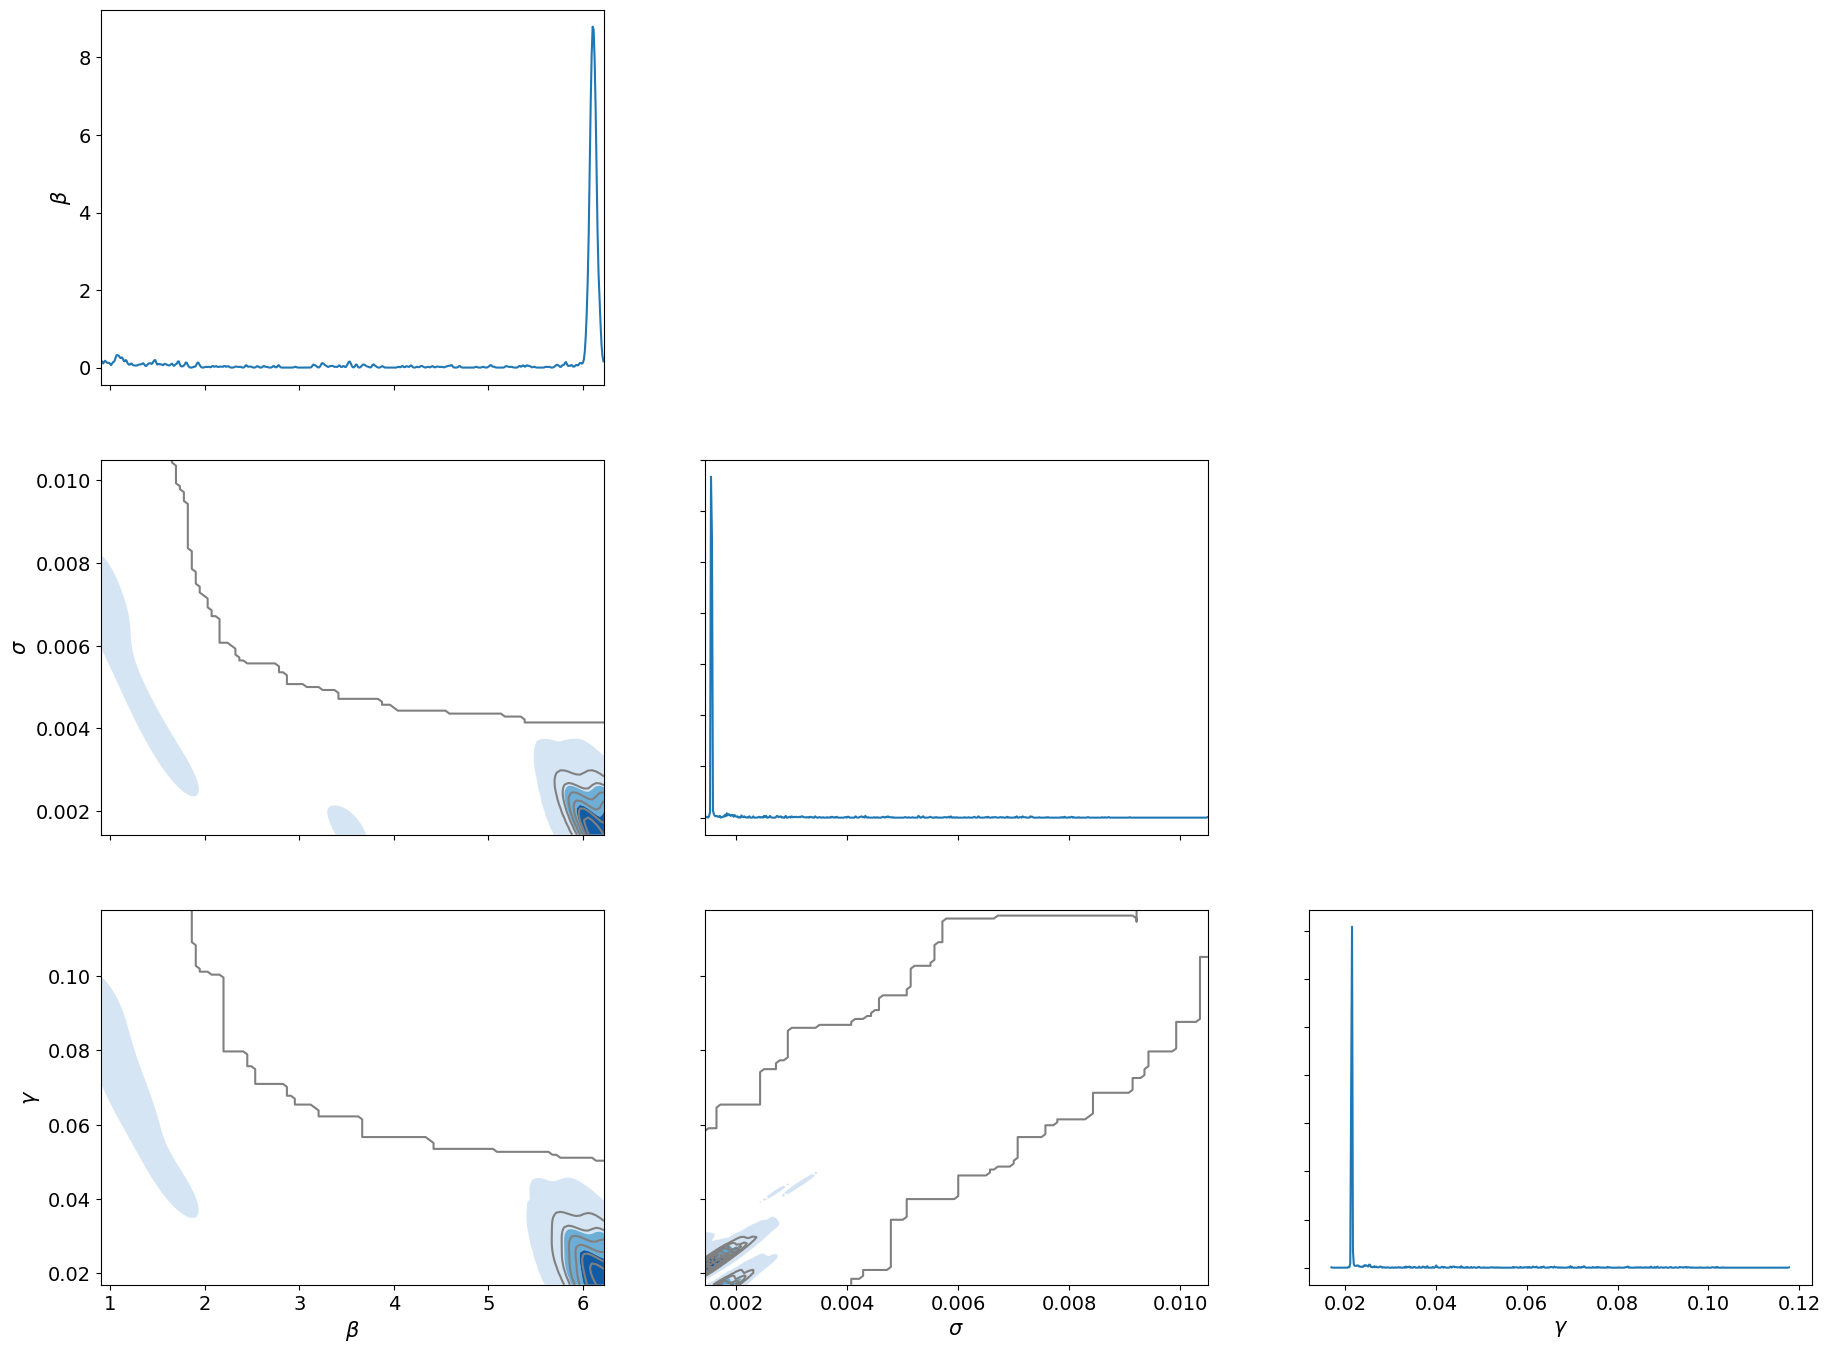

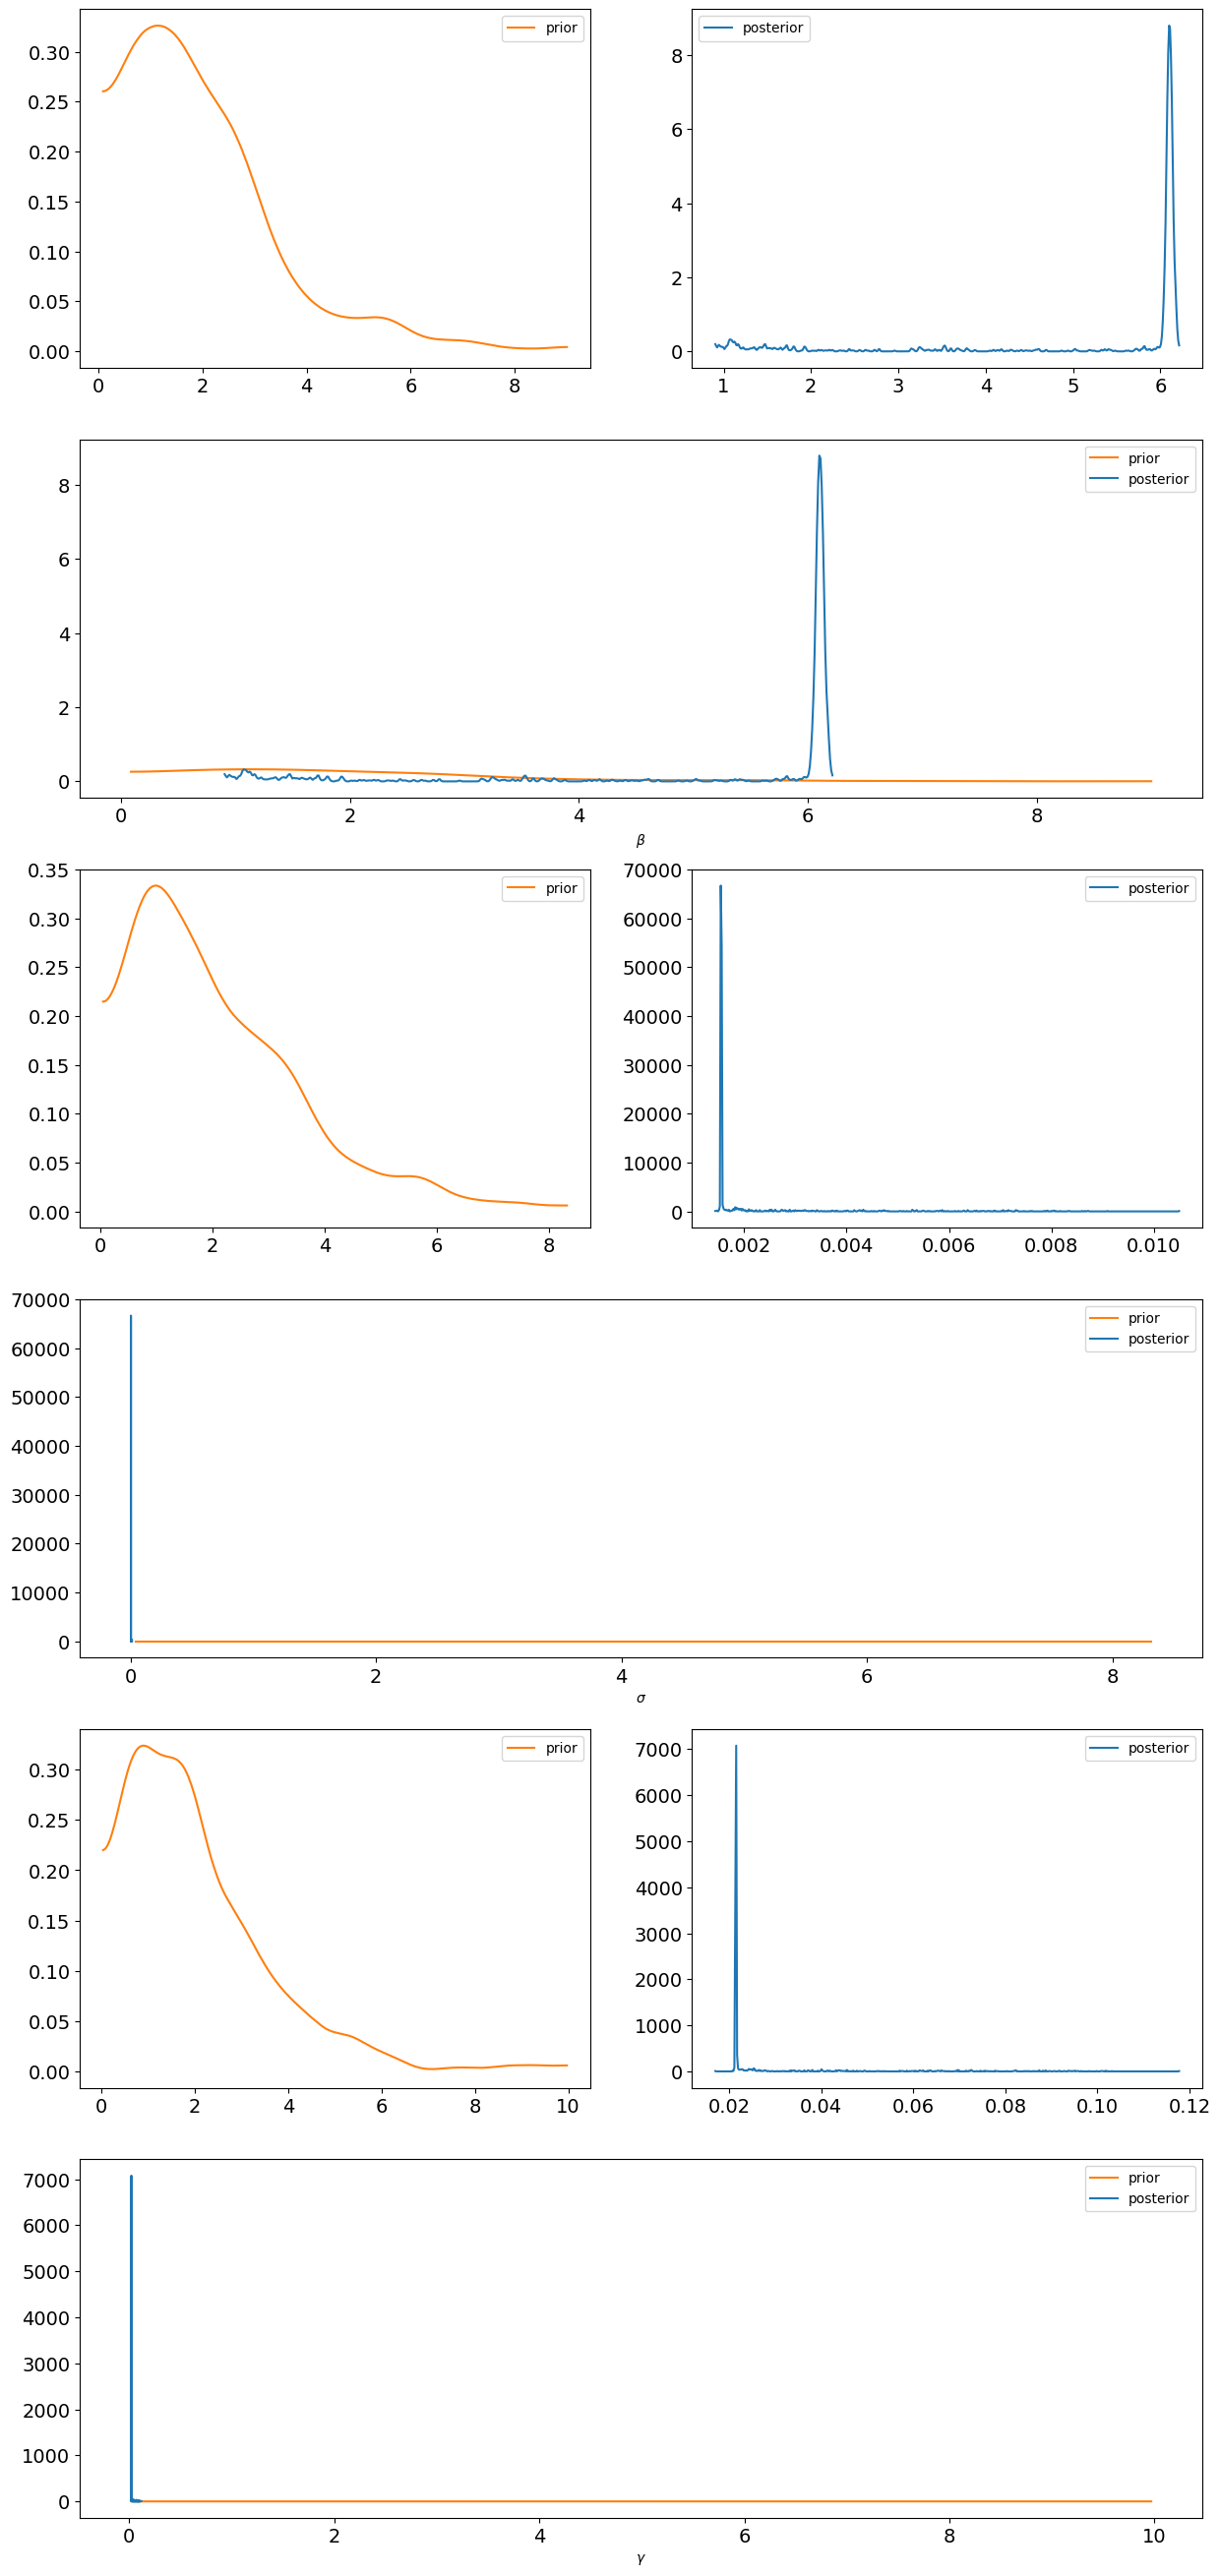

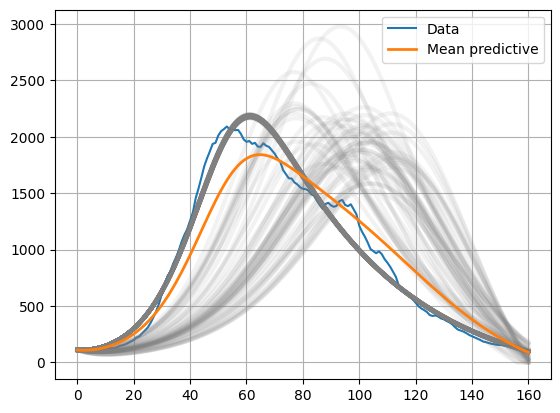

In [20]:
# subsampling and removing burnin
seir_emcee.create_dictionary(burnin=1000, subsample=5)

seir_emcee.report_results()

In [21]:
seir_emcee.Output[:5,0,:]

array([[0.12631363, 0.52419558, 0.18198691],
       [0.14499433, 0.49619451, 0.16141111],
       [0.26696951, 0.45900574, 0.08645657],
       [0.26696951, 0.45900574, 0.08645657],
       [0.26696951, 0.45900574, 0.08645657]])